In [2]:
import sys
import os

# 將父目錄加入到模組搜索路徑中
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from utils import helper_function as hp

hp.import_or_install('cv2', 'opencv-python')
hp.import_or_install('skimage', 'scikit-image')

區域分割中的「分離與合併式」方法（也稱為分離合併法，Segmentation by Separation and Merging）是一種分割圖像的技術，旨在將圖像分割成具有相似屬性的區域。這種方法通常包括兩個主要步驟：

1. **分離（Separation）**：
   - 在這一步驟中，圖像首先被分割成若干個小區域或區塊。這些小區域的分割通常是基於某些準則，如顏色、強度、紋理等屬性。分離的目的是將圖像劃分為多個較小的、相對均勻的區域，但這些區域可能會過度分割，導致有些區域在實際上應該被合併的情況下仍然被保留為單獨的區域。

2. **合併（Merging）**：
   - 在這一步驟中，對於在分離階段產生的過度細分區域進行合併。合併的目的是根據某些標準（如區域內部的均勻性或相似性）來將相鄰或相似的區域重新合併成更大的區域。這樣可以減少過度細分的情況，並使最終的分割結果更符合實際需求。

### 優點：
- **靈活性**：可以根據不同的應用需求和特徵來設計分離和合併的策略。
- **準確性**：通過先分離再合併，可以有效地處理複雜的圖像結構，減少過度或不足分割的問題。

### 缺點：
- **計算量大**：分離和合併的過程可能需要較高的計算資源，特別是對於高解析度的圖像。
- **參數選擇**：合併的標準和分離的準則需要根據實際情況進行調整，這可能需要大量的試驗和調整。

這種方法通常用於需要較高分割準確性的場景，例如醫學影像分析或遙感影像處理。

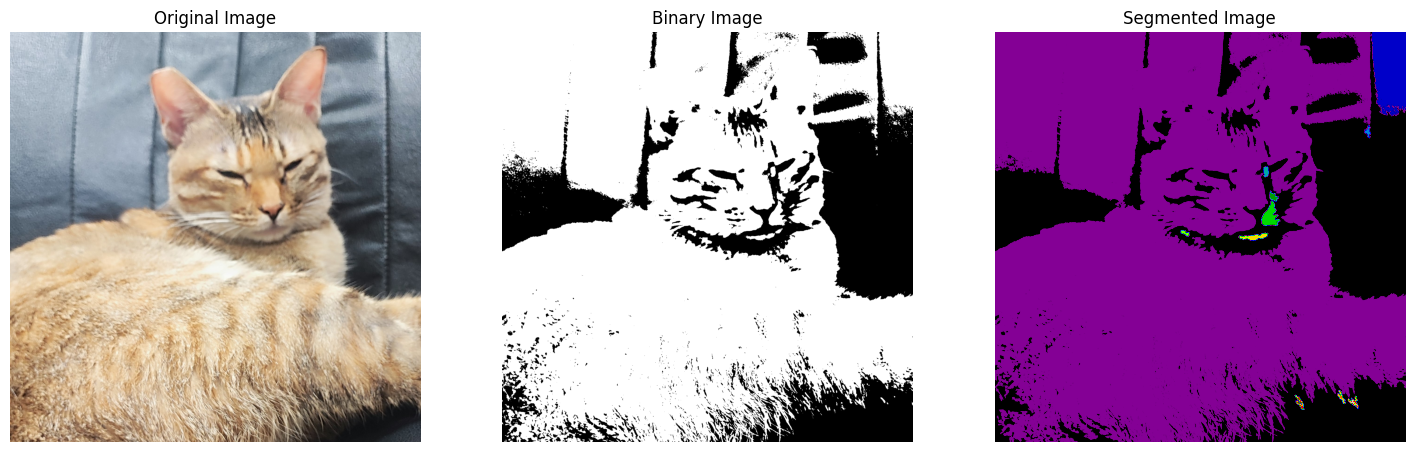

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, measure, morphology
from skimage.color import rgb2gray

# 讀取圖像
image_path = r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg'  # 請更改為你的圖像路徑
image = cv2.imread(image_path)

# 確保圖像成功讀取
if image is None:
    raise FileNotFoundError(f"無法讀取圖像，請檢查路徑：{image_path}")

# 將圖像轉換為RGB格式
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 將圖像轉換為灰階
gray_image = rgb2gray(image_rgb)

# 使用Otsu's閾值進行圖像分割
threshold = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold

# 將二值圖像的噪聲移除
cleaned_image = morphology.remove_small_objects(binary_image, min_size=500)

# 標記連通區域
label_image, num_labels = measure.label(cleaned_image, connectivity=2, return_num=True)

# 顯示結果
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='gray')
axes[1].set_title('Binary Image')
axes[1].axis('off')

axes[2].imshow(label_image, cmap='nipy_spectral')
axes[2].set_title('Segmented Image')
axes[2].axis('off')

plt.show()


**分水嶺式區域分割法（Watershed Segmentation）** 是一種基於形態學的圖像分割技術，它以圖像中的灰度或顏色強度作為分割的基礎，模擬水流在地形中的分布來確定區域的邊界。這種方法特別適合處理具有明顯邊界和不同區域的圖像，如細胞圖像或衛星圖像等。

### 分水嶺算法的基本概念

1. **灰度地形模型**：
   - 將圖像視為一個地形模型，其中每個像素的灰度值表示地形的高度。圖像中的高亮區域代表高地，而低亮區域代表低地。

2. **水位上升**：
   - 模擬水位在地形中上升的過程。水從低地流向高地，並且在地形的不同區域之間形成分水嶺。

3. **分水嶺線**：
   - 當水位上升到達地形的高峰時，水流會形成一條分水嶺線，這條線代表了不同區域之間的邊界。

### 分水嶺算法的步驟

1. **圖像預處理**：
   - 通常需要進行圖像平滑或去噪處理，以減少細小的噪聲影響。

2. **計算梯度圖像**：
   - 通常使用Sobel算子或其他邊緣檢測算子來計算圖像的梯度圖像，以確定圖像中邊緣的位置。

3. **確定種子點**：
   - 選擇圖像中的種子點，這些點代表了圖像中的不同區域。

4. **執行分水嶺轉換**：
   - 使用分水嶺算法來計算水位上升過程，並形成分水嶺線。

5. **後處理**：
   - 可能需要進行一些後處理，如去除小區域或合併相似區域，以得到最終的分割結果。

### 優點與缺點

**優點**：
- **自動化**：不需要手動指定區域邊界。
- **適應性**：能夠處理複雜的圖像結構，並且對形狀變化的適應性強。

**缺點**：
- **計算複雜度高**：在處理大型圖像時，計算量可能很大。
- **對噪聲敏感**：噪聲和小的變化可能會影響分割效果。

### Python範例

以下是使用OpenCV進行分水嶺分割的簡單示例程式碼：


### 說明：
1. **圖像預處理**：進行灰階轉換和高斯模糊。
2. **邊緣檢測**：使用Canny邊緣檢測算子檢測圖像邊緣。
3. **距離變換**：計算距離變換以確定前景區域。
4. **背景確定**：確定背景區域。
5. **分水嶺轉換**：應用分水嶺算法進行圖像分割。

請確保將 `image_path` 替換為實際圖像的路徑。這段程式碼將顯示分割結果和邊緣檢測圖像。

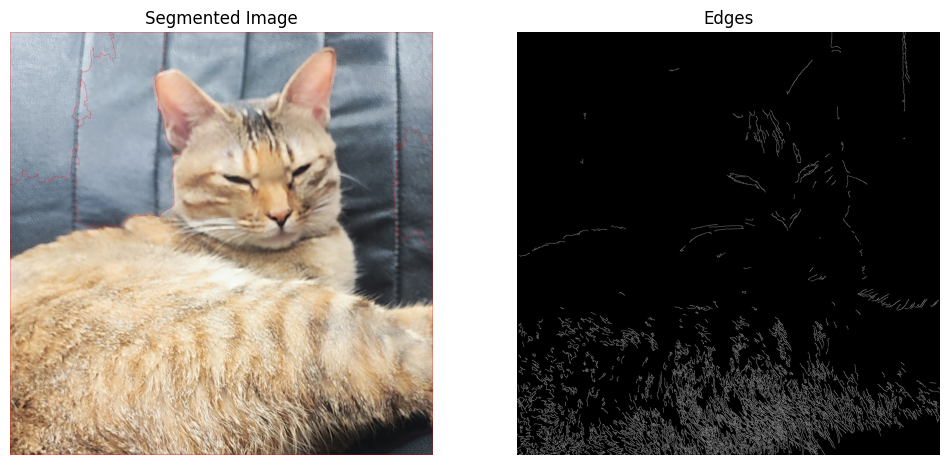

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像並轉換為灰階
image_path = r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg'  # 請更改為你的圖像路徑
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 應用高斯模糊以減少噪聲
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 使用Canny邊緣檢測
edges = cv2.Canny(blurred, 50, 150)

# 膨脹邊緣以填補空洞
dilated = cv2.dilate(edges, None, iterations=3)

# 應用距離變換
dist_transform = cv2.distanceTransform(cv2.bitwise_not(dilated), cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# 確定背景區域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(cv2.bitwise_not(dilated), sure_fg)

# 標記確定區域
_, markers = cv2.connectedComponents(sure_fg)

# 加1以確保背景是標記0
markers = markers + 1
markers[unknown == 255] = 0

# 應用分水嶺算法
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  # 將分水嶺邊界標記為紅色

# 顯示結果
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Segmented Image')
axes[0].axis('off')

axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Edges')
axes[1].axis('off')

plt.show()